In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

from sklearn.preprocessing import StandardScaler

Loading BokehJS ...

In [2]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Dealing with missing Data

In [3]:
def show_missing(df):
    missing = df.columns[df.isnull().any()].tolist()
    return missing

In [4]:
df_train[show_missing(df_train)].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### LotFrontage/LotArea

In [5]:
# check correlation with LotArea
print"Correlation with LotArea: " + \
    str(df_train['LotFrontage'].corr(df_train['LotArea']))


# LotFrontage may have higher correlation with SqrtLotArea(Assuming its a normal shape)
df_train['SqrtLotArea']=np.sqrt(df_train['LotArea'])
print"Correlation with SqrtLotArea: " + \
    str(df_train['LotFrontage'].corr(df_train['SqrtLotArea']))

Correlation with LotArea: 0.426095018772
Correlation with SqrtLotArea: 0.602002216794


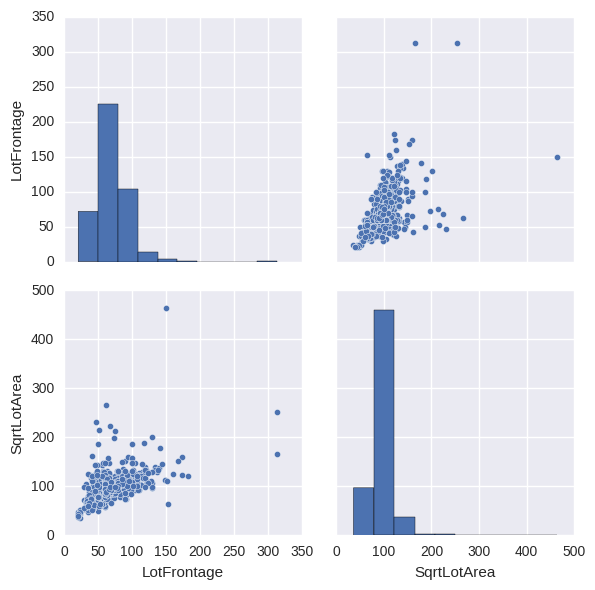

In [6]:
sns.pairplot(df_train[['LotFrontage','SqrtLotArea']].dropna(), size=3, aspect=1)

In [7]:
cond = df_train['LotFrontage'].isnull()
df_train.loc[cond, 'LotFrontage']=df_train.SqrtLotArea[cond]

# SqrtLotArea is not needed anymore
del df_train['SqrtLotArea']

### Alley

In [8]:
print df_train['Alley'].value_counts()
df_train['Alley'].fillna('None', inplace=True)

Grvl    50
Pave    41
Name: Alley, dtype: int64


### MasVnr

In [9]:
print df_train['MasVnrType'].value_counts()
df_train['MasVnrType'].fillna('None', inplace=True)
df_train['MasVnrArea'].fillna(0.0, inplace=True)

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


### Basement

In [10]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
df_train[basement_cols][df_train['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


In [11]:
cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in cols:
    df_train[col].fillna('None', inplace=True)

### Electrical

In [12]:
print df_train['Electrical'].value_counts()
df_train['Electrical'].fillna('SBrkr', inplace=True)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


### Fireplace

In [13]:
print df_train['FireplaceQu'].value_counts()
print df_train['Fireplaces'][df_train['FireplaceQu'].isnull()==True].describe()
df_train['FireplaceQu'].fillna('None', inplace=True)
pd.crosstab(df_train['Fireplaces'], df_train['FireplaceQu'])

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
count    690.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Fireplaces, dtype: float64


FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,690,0,0
1,19,28,324,0,20,259
2,4,4,54,0,0,53
3,1,1,2,0,0,1


### Garages

In [14]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
df_train[garage_cols][df_train['GarageType'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0


In [15]:
for col in garage_cols:
    if df_train[col].dtype==np.object:
        df_train[col].fillna('None', inplace=True)
    else:
        df_train[col].fillna(0, inplace=True)

### Pool

In [16]:
print df_train['PoolQC'].value_counts()
print df_train['PoolArea'][df_train['PoolQC'].isnull()==True].describe()
df_train['PoolQC'].fillna('None', inplace=True)

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
count    1453.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: PoolArea, dtype: float64


### Fence

In [17]:
df_train['Fence'].fillna('None', inplace=True)

### MiscFeature

In [18]:
df_train['MiscFeature'].fillna('None', inplace=True)

## All missing data:

In [19]:
df_train[show_missing(df_train)].isnull().sum()

Series([], dtype: float64)

# Feature Analysis

In [20]:
df_train['Age'] = df_train['YrSold'] - df_train['YearBuilt']
df_train['remodAge'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_train['GarageAge'] = df_train['YrSold'] - df_train['GarageYrBlt']
del df_train['YearBuilt']
del df_train['YearRemodAdd']
a = df_train['SalePrice']
del df_train['SalePrice']
df_train['SalePrice'] = a

In [21]:
def histogram(p, df, col):
    val = df_train[col]
    mean, std = val.mean(), val.std()
    hist, edges = np.histogram(val, density=True, bins=50)
    x = np.linspace(val.min(), val.max(), 1000)

    # pdf = stats.norm.pdf(val.values, mean, std)
    pdf = 1/(std * np.sqrt(2*np.pi)) * np.exp(-(x-mean)**2 / (2*std**2))
    # pdf2 = 1/(x* std * np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mean)**2 / (2*std**2))

    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
            fill_color="#036564", line_color="#033649")
    p.line(x, pdf, line_color="#D95B43", line_width=4, alpha=0.7, legend="PDF")

    p.legend.location = "top_right"
    p.xaxis.axis_label = col
    p.title.text = "'{}' distribution".format(col) 
    return p

In [22]:
#descriptive statistics summary
print df_train['SalePrice'].describe()

#skewness and kurtosis
print("\nSkewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

#histogram
p = figure(toolbar_location=None)
show(histogram(p, df_train, 'SalePrice'))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


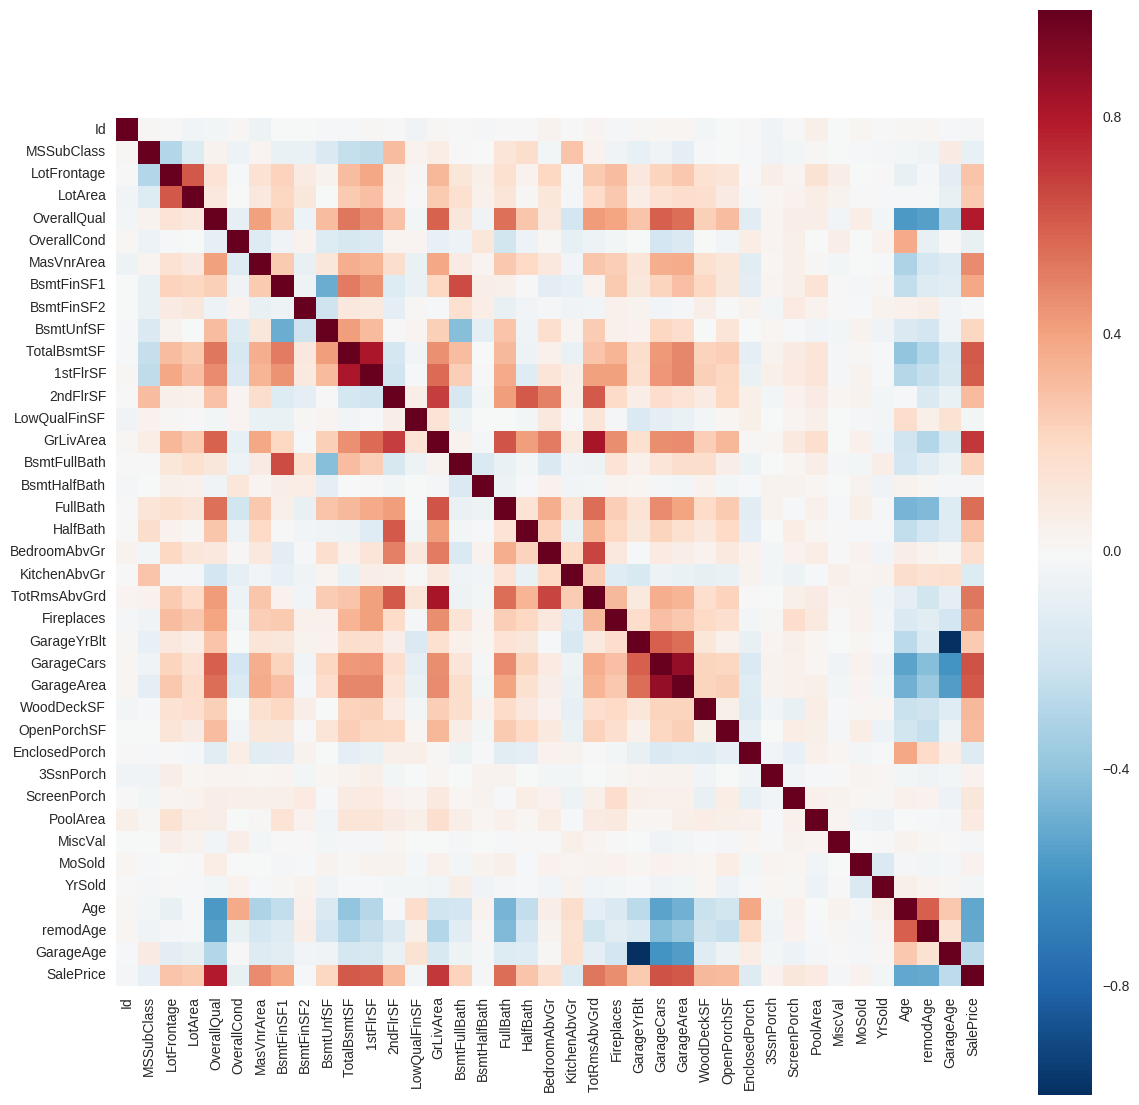

In [23]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corrmat, vmax=.8, square=True);

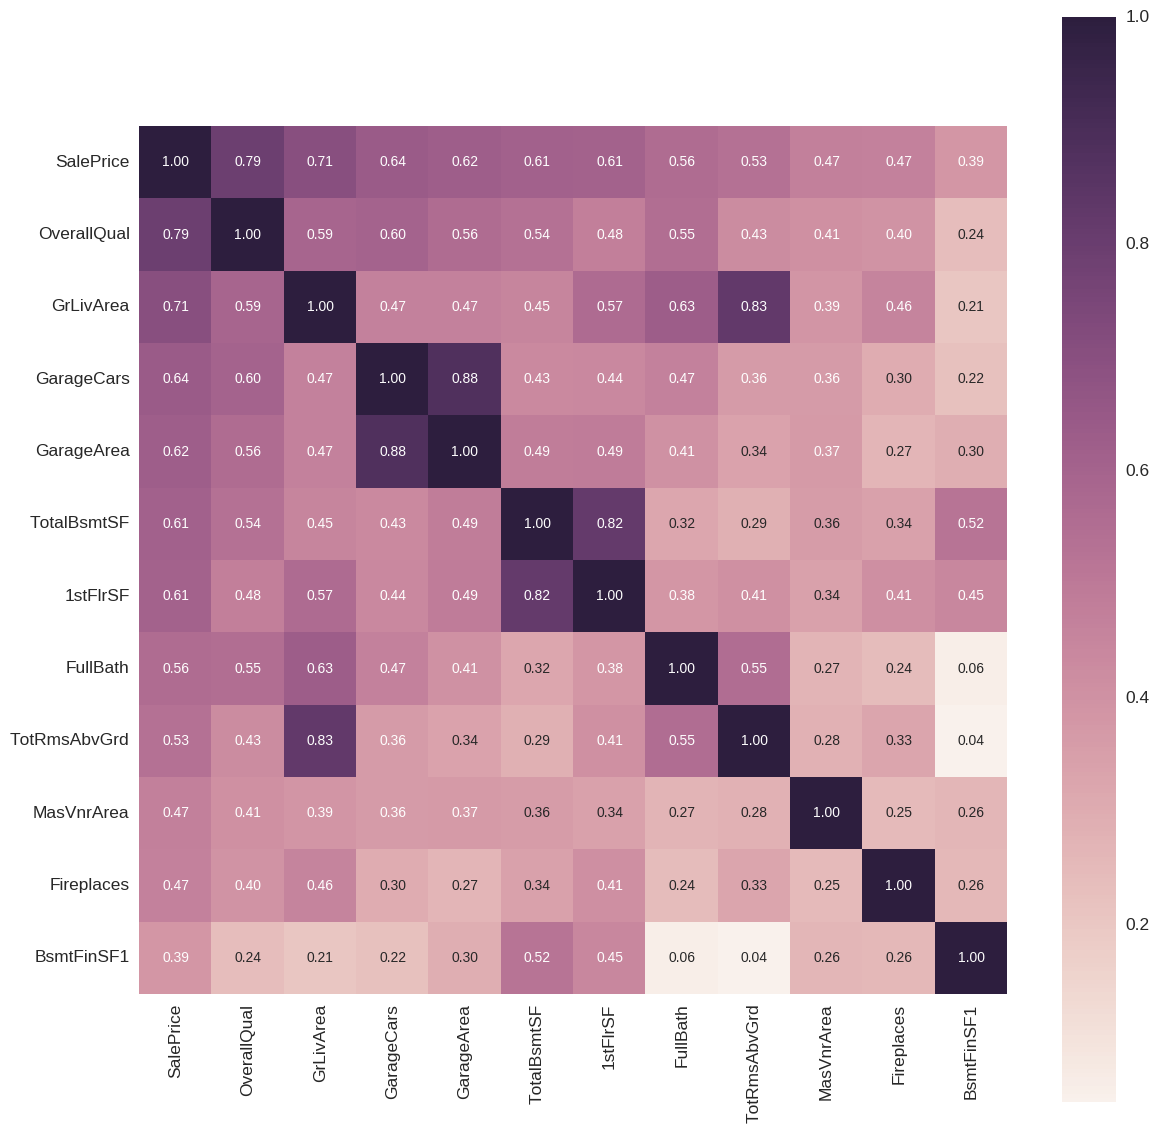

In [24]:
#saleprice correlation matrix
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(14, 14))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

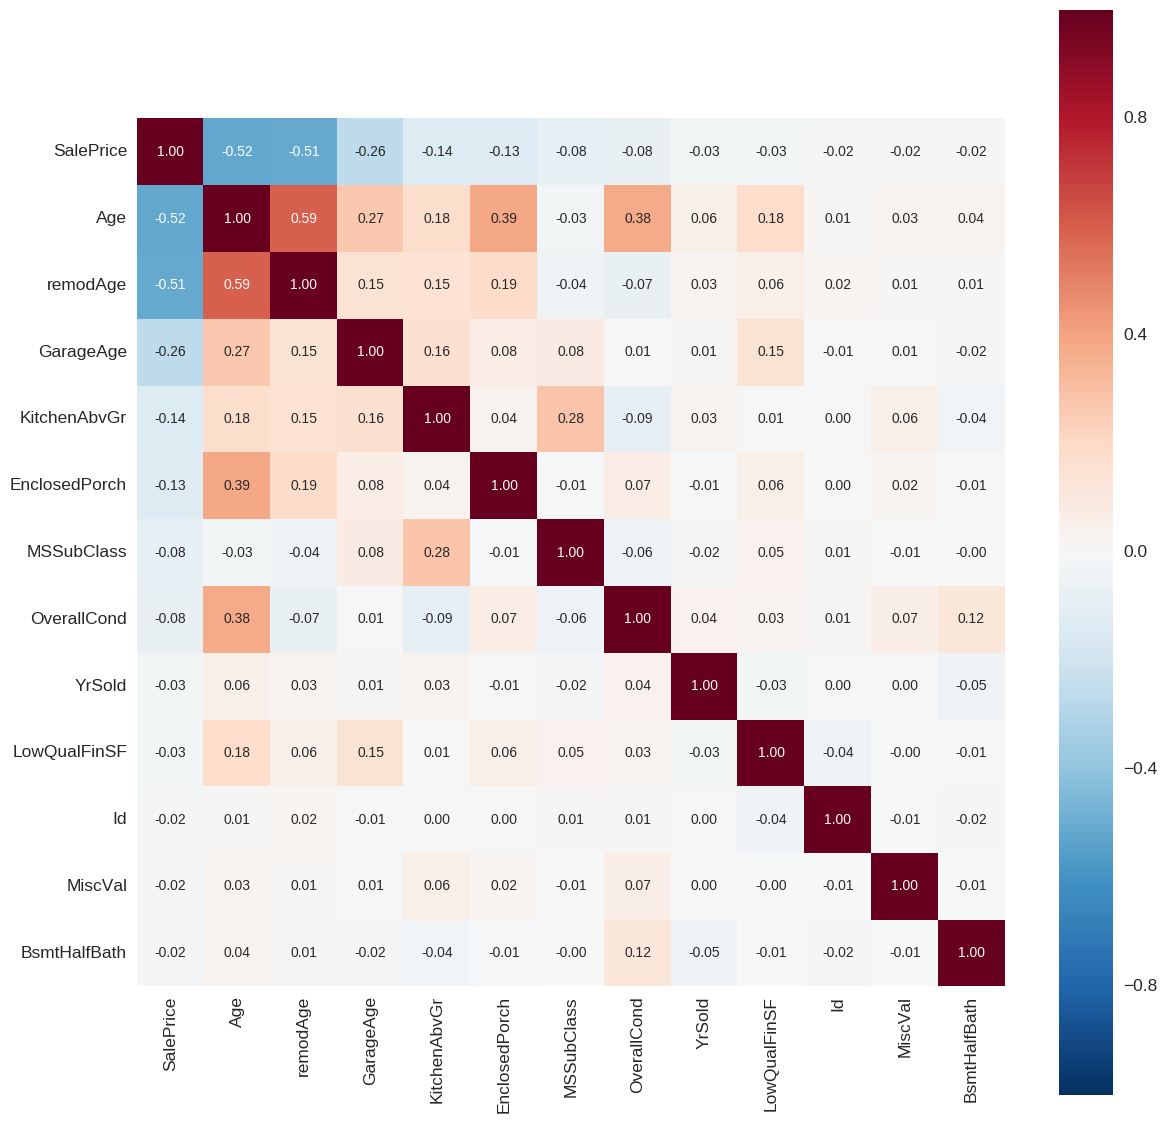

In [25]:
#saleprice correlation matrix
k = 12 #number of variables for heatmap
cols = ['SalePrice'] + corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index.tolist()
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(14, 14))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)
plt.show()

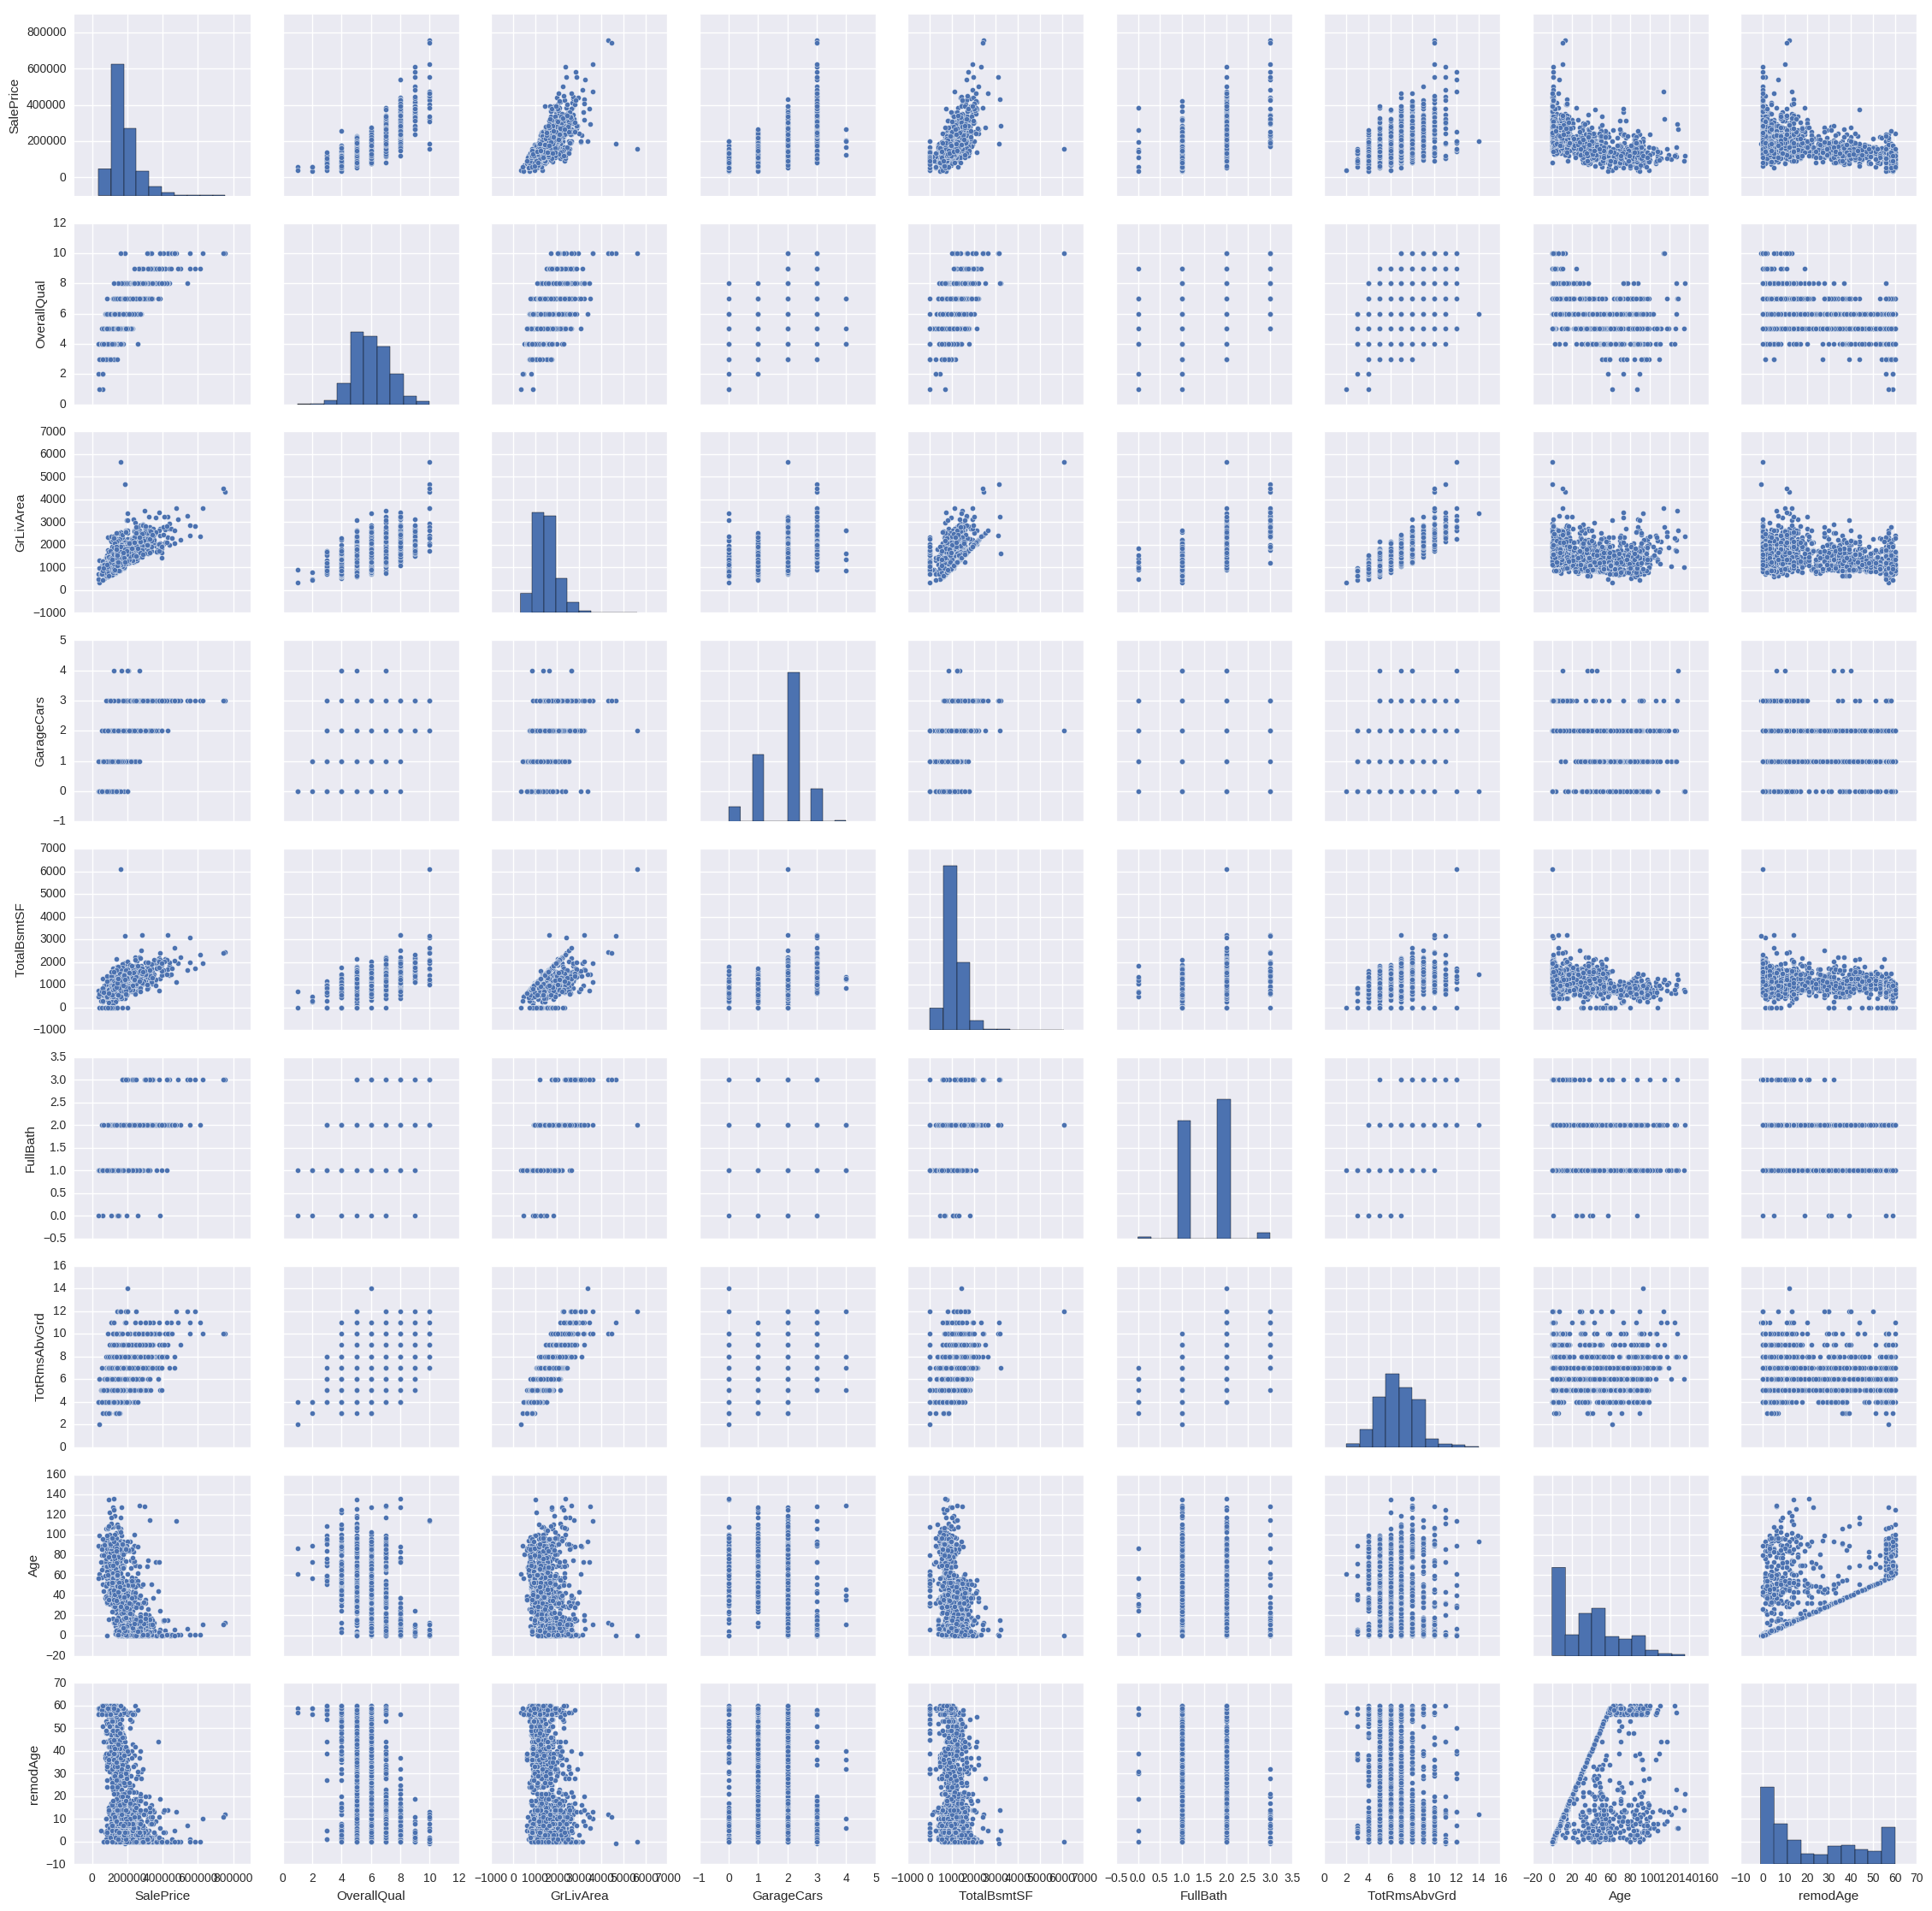

In [26]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'Age', 'remodAge']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Outliers

In [27]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[ 3.82897043]
 [ 4.04098249]
 [ 4.49634819]
 [ 4.71041276]
 [ 4.73032076]
 [ 5.06214602]
 [ 5.42383959]
 [ 5.59185509]
 [ 7.10289909]
 [ 7.22881942]]


/home/ali/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ali/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Bivariate analysis

### GrLivArea

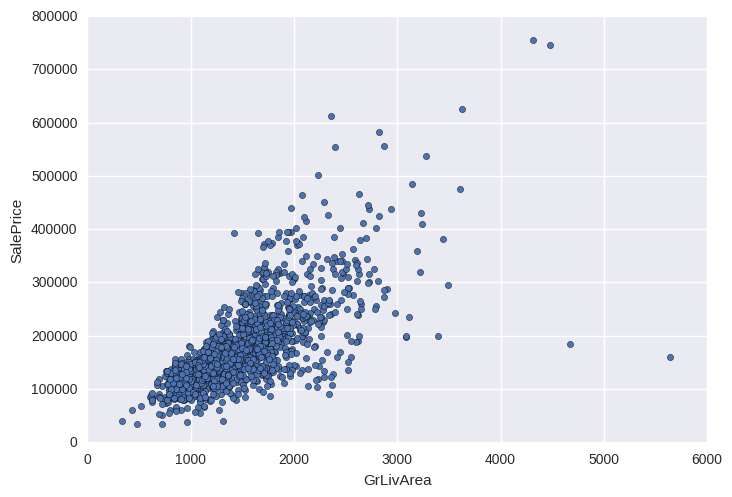

In [28]:
#bivariate analysis saleprice/OverallQual
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [29]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

### TotalBsmtSF

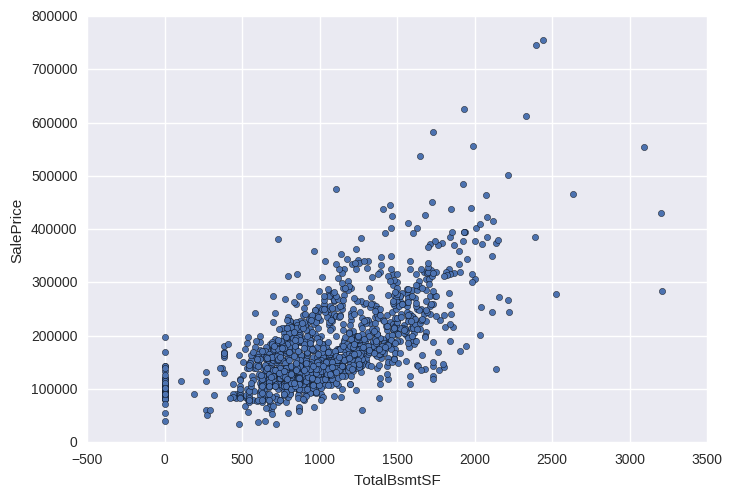

In [30]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### Age

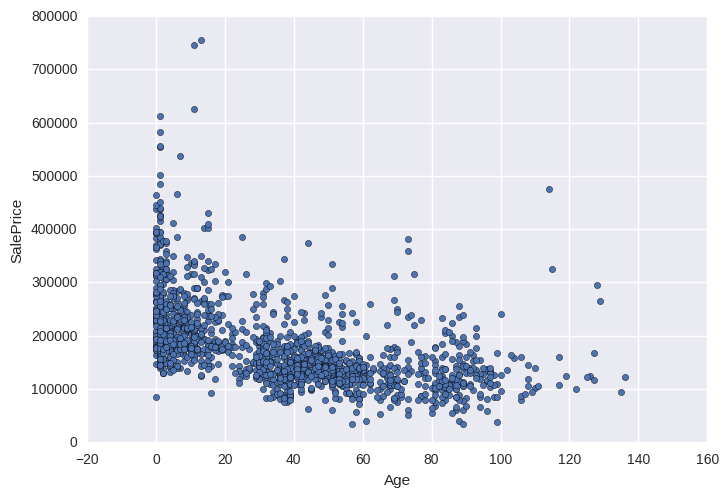

In [31]:
#bivariate analysis saleprice/Age
var = 'Age'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### remodAge

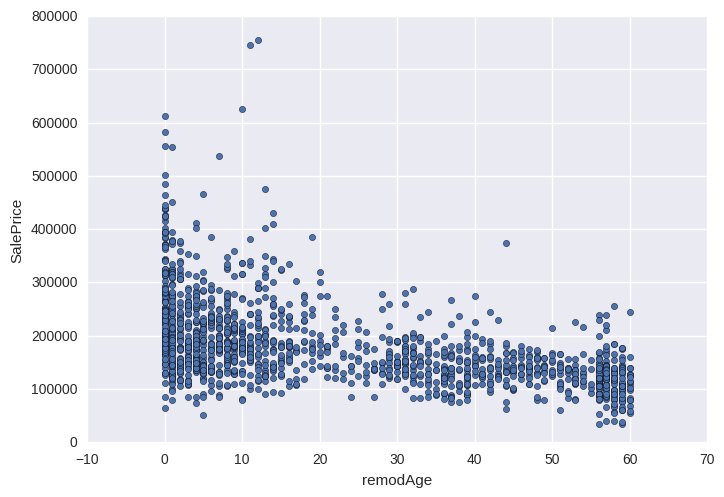

In [32]:
#bivariate analysis saleprice/remodAge
var = 'remodAge'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [33]:
categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
                       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
                       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
                       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
                       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
                       'SaleType', 'SaleCondition','YrSold', 'BsmtFullBath', 'BsmtHalfBath',
                       'FullBath', 'HalfBath', 'MoSold', 'BedroomAbvGr', 'KitchenAbvGr',
                       'TotRmsAbvGrd', 'GarageCars']

In [34]:
numerical_columns = ['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                     'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                     'GrLivArea', 'GarageAge', 'GarageArea', 'WoodDeckSF',
                     'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                     'PoolArea', 'MiscVal']

In [35]:
def categoriy_df(df, col):
    vc = df[col].value_counts().to_frame()
    total_sum = vc[col].sum()
    vc['percent'] = vc[col] * 100 / total_sum
    return vc.reset_index()


def bar(df, col, title=None, width=280, height=280):
    vc = categoriy_df(df, col)
    vc['percent'] = vc['percent'].apply(lambda i: "{0:.3}%".format(i))
    vc['index'] = vc['index'].astype('str')
    
    
    source = ColumnDataSource(data=dict(x=vc['index'], y=vc[col], percent=vc['percent']))
    hover = HoverTool(
        tooltips=[
            ('category', '@x'),
            ('percent', '@percent'),
        ]
    )
    p = figure(title=title, 
               x_range=vc['index'].values.tolist(), 
               plot_width=width, plot_height=height, 
               toolbar_location=None,
               tools=[hover]
              )
    
    p.vbar(x='x', source=source, width=0.5, bottom=0, top='y')
    p.yaxis.visible = False

    p.xaxis.axis_label = col
    p.xaxis.axis_label_standoff = -1
    return p

In [36]:
def trim_categories(df, col, threshold=2.0):
    vc = categoriy_df(df, col)
    vc = vc[vc['percent'] >= threshold]
    
    df.loc[~df[col].isin(vc['index']), col] = 'Other'
    return df


def side_by_side1(df, col, size=(400, 400), threshold=2.0):
    p = bar(data, col, width=size[0], height=size[1])
    df = trim_categories(df, col, threshold=threshold)

    q = bar(data, col, width=size[0], height=size[1])
    return p, q

In [37]:
data = df_train.copy()

In [38]:
rows = []
for column in categorical_columns:
    s1, s2 = side_by_side1(data, column, threshold=5.0)
    rows.append([s1, s2])
    
show(gridplot(rows))

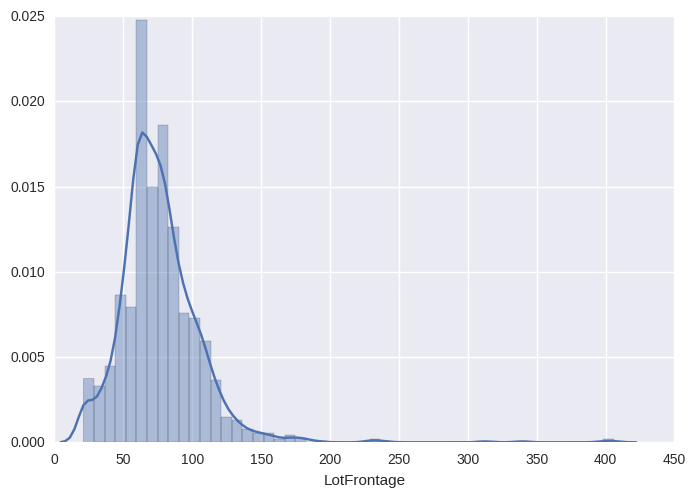

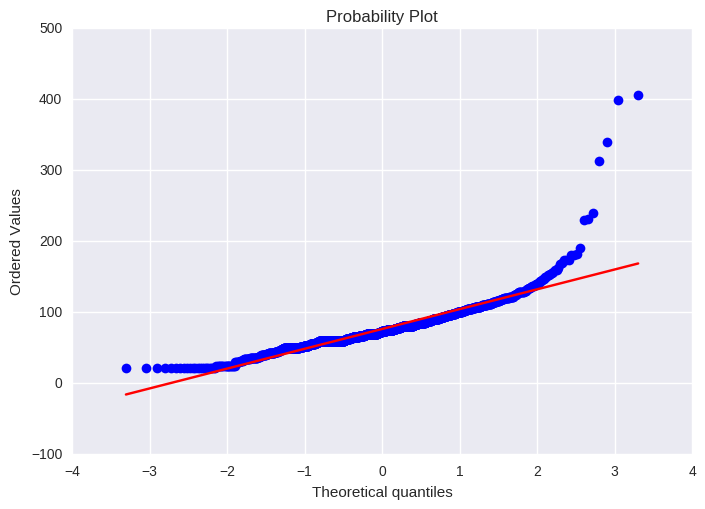

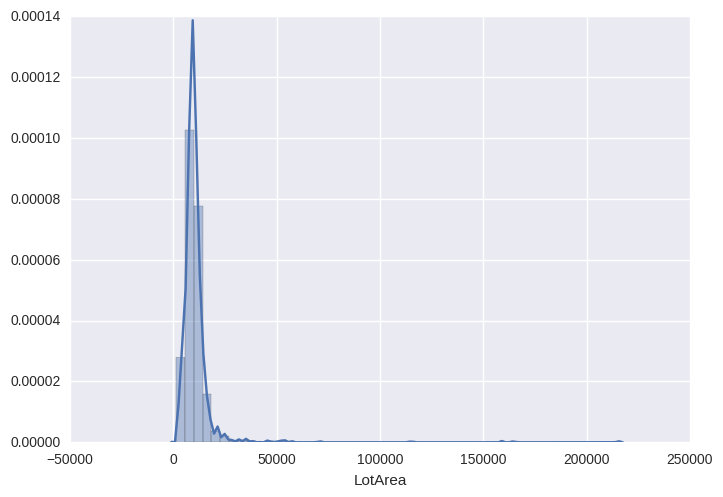

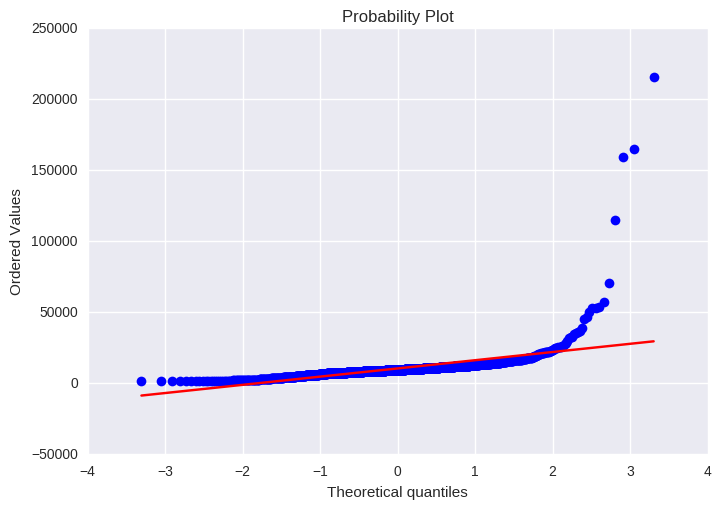

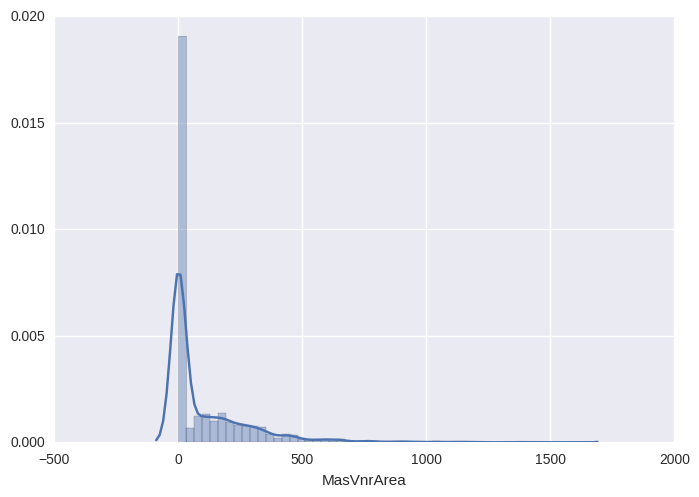

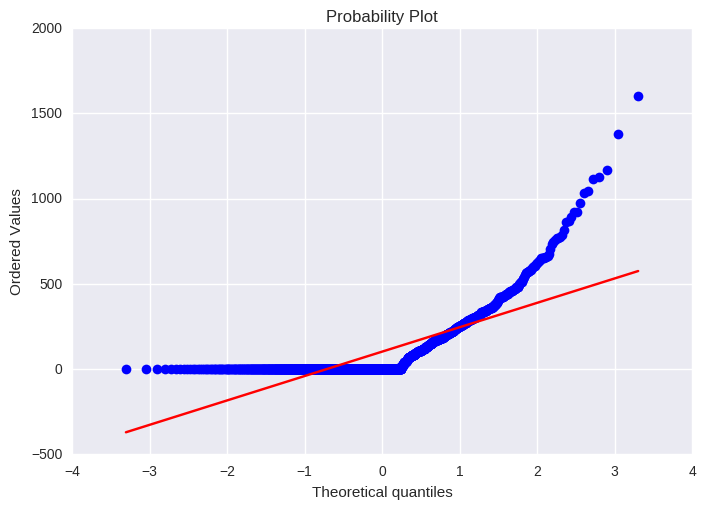

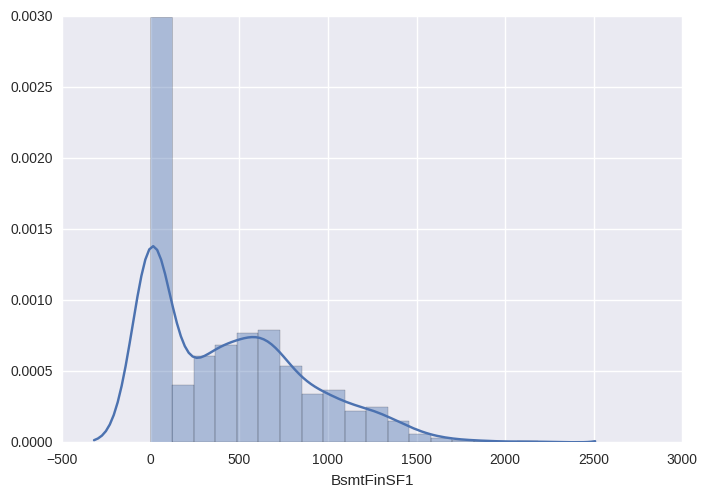

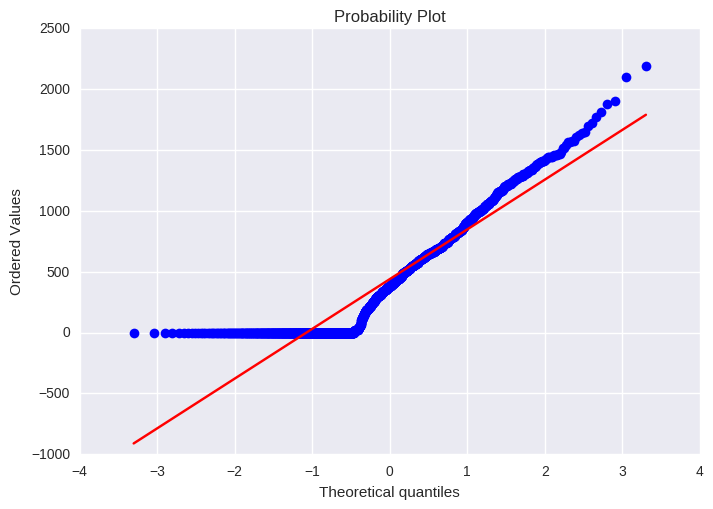

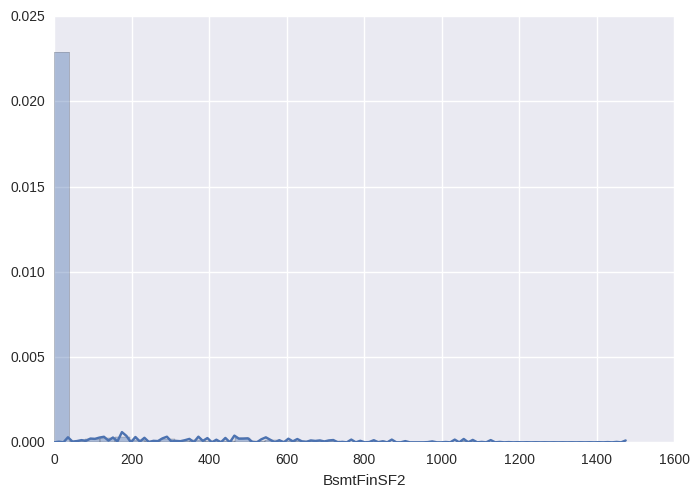

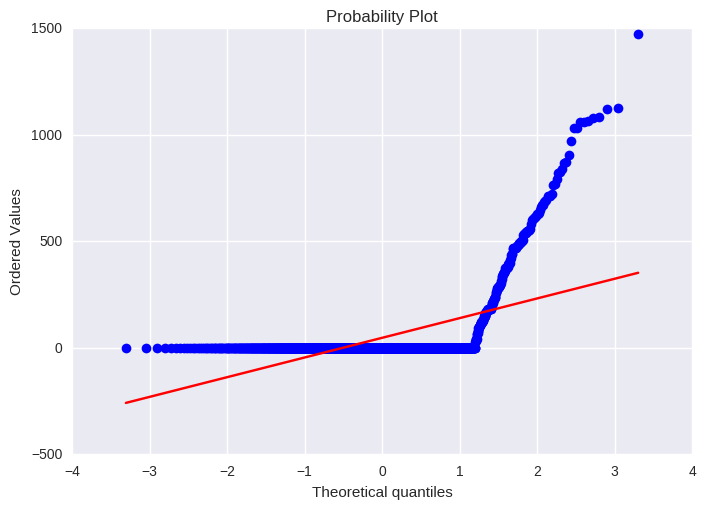

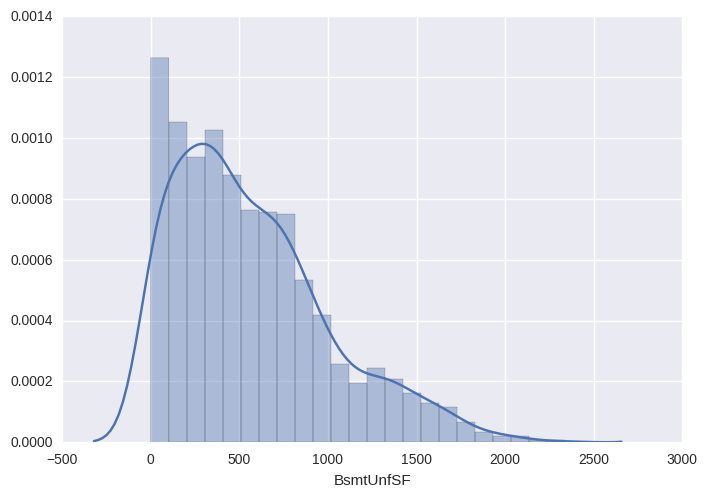

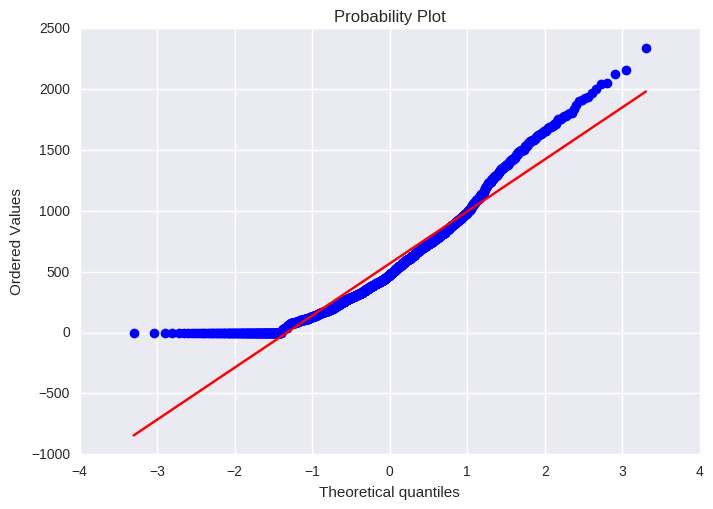

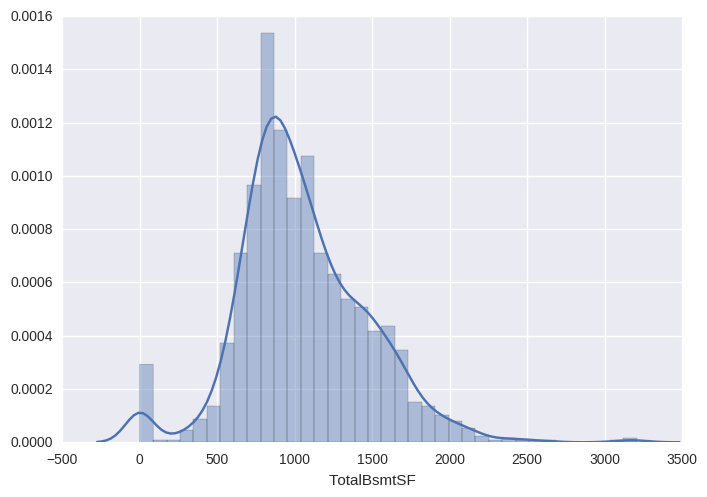

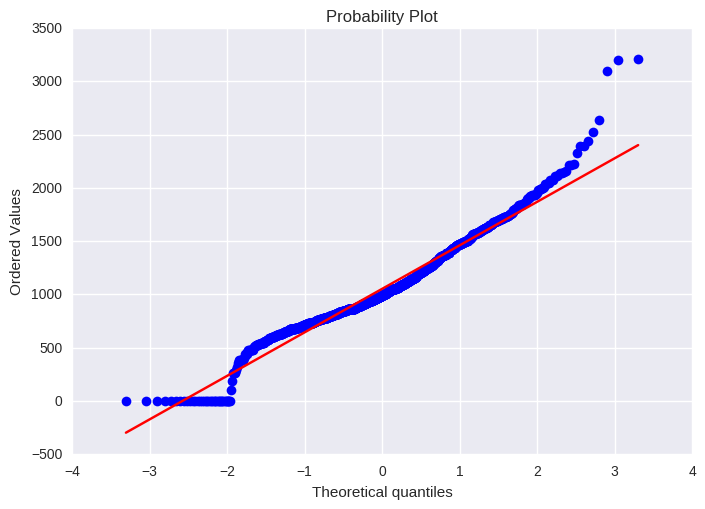

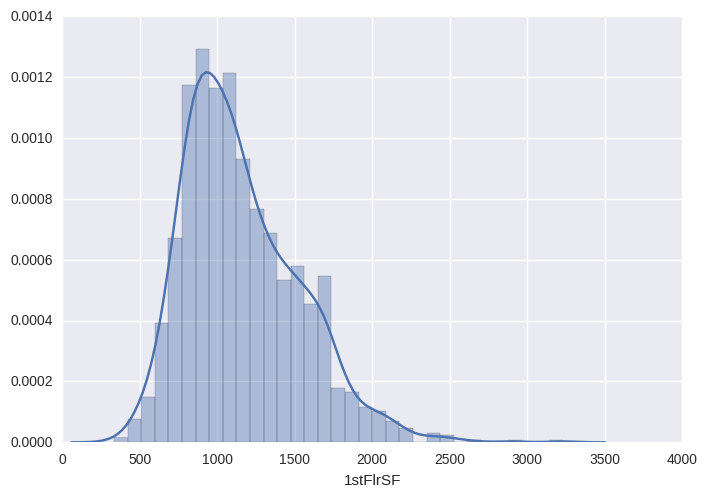

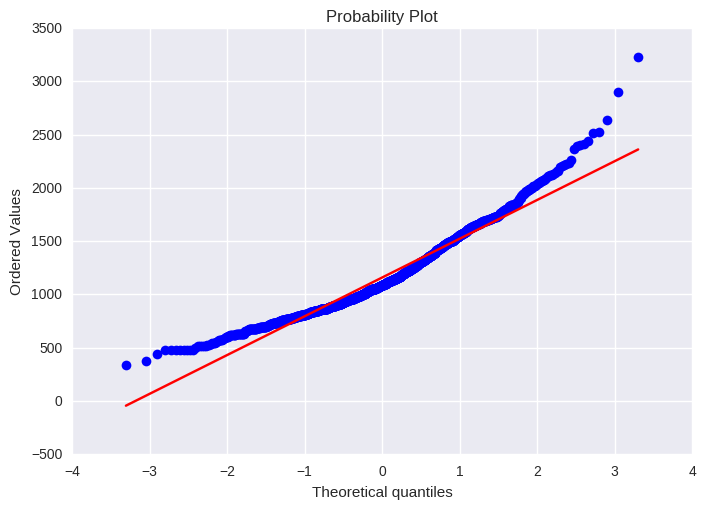

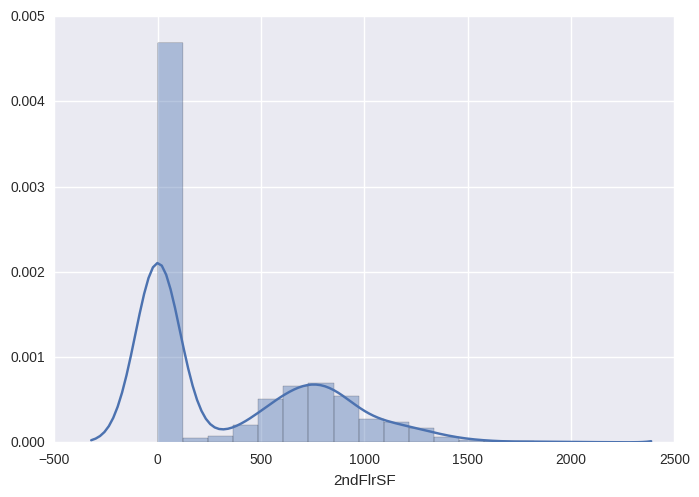

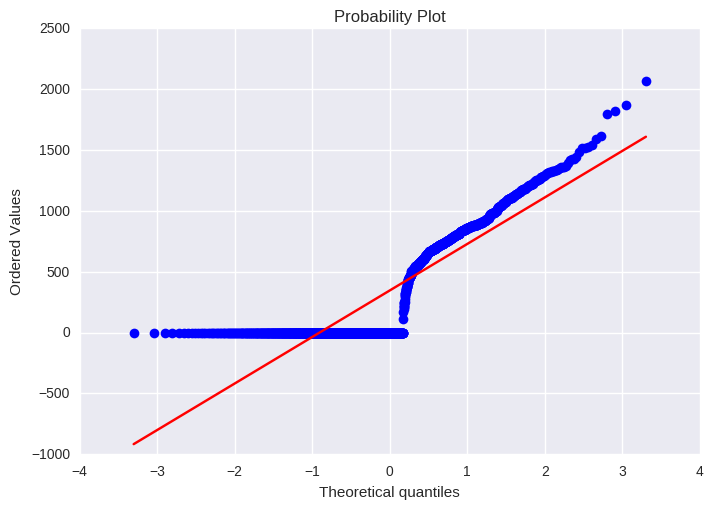

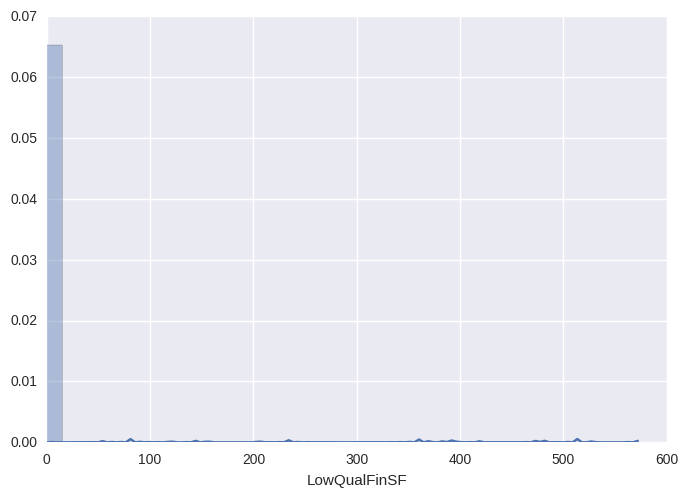

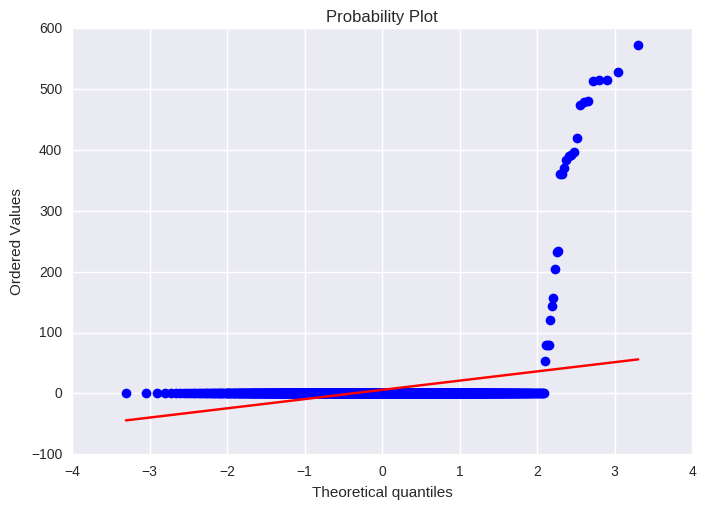

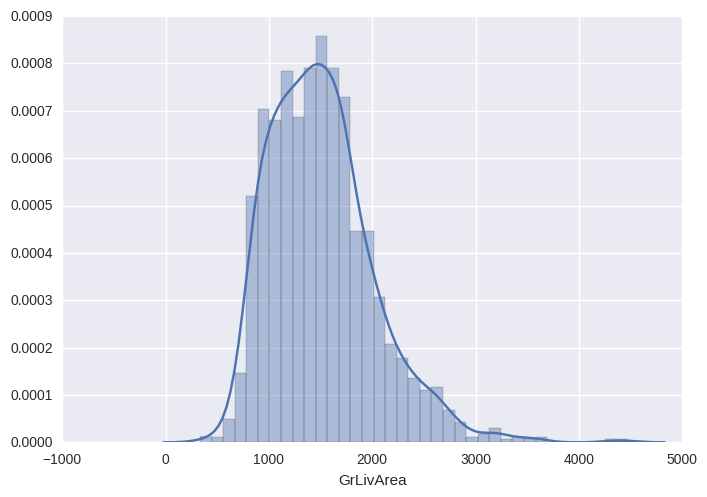

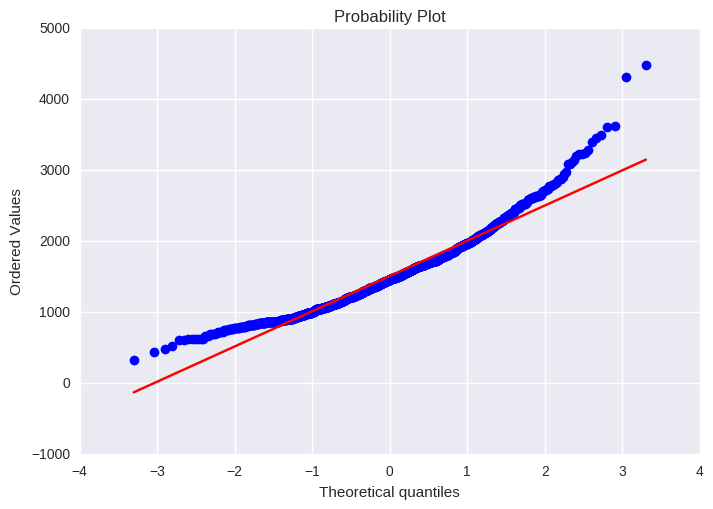

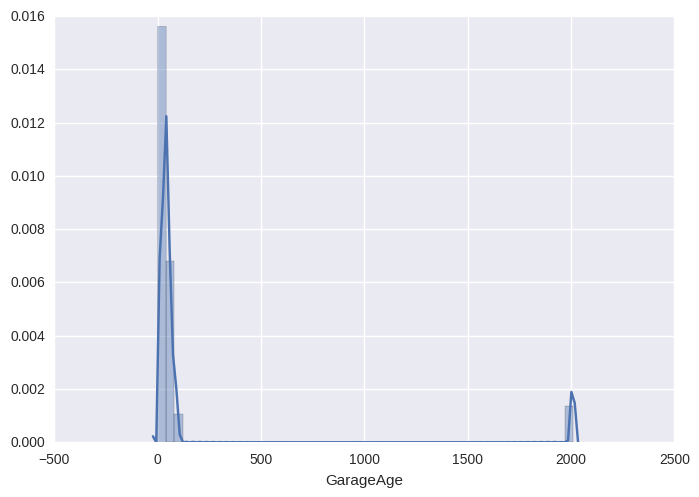

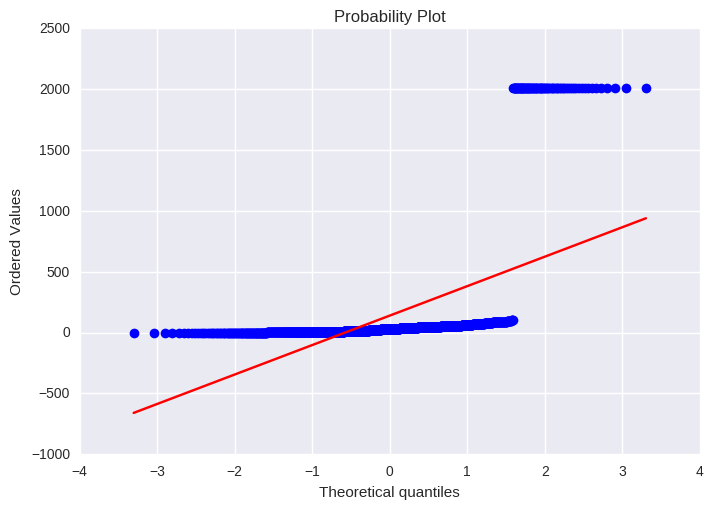

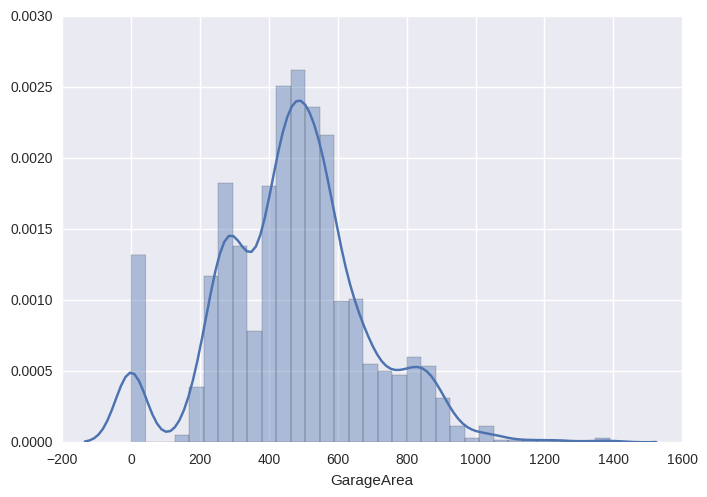

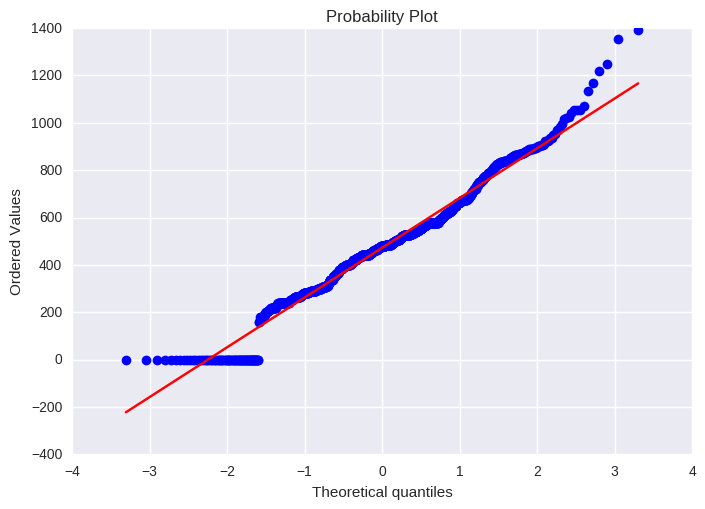

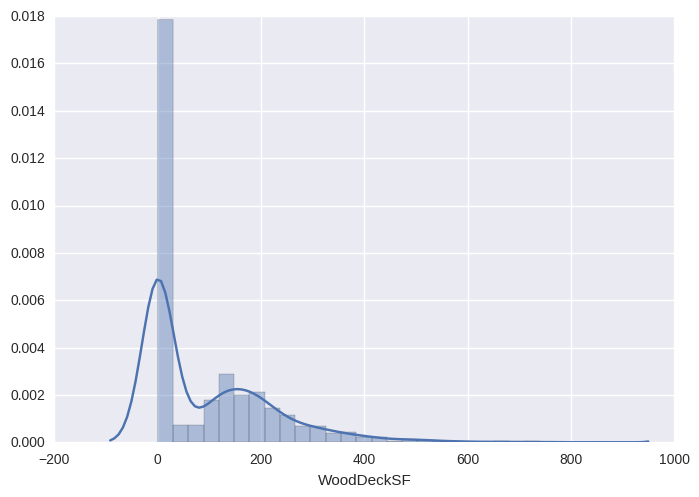

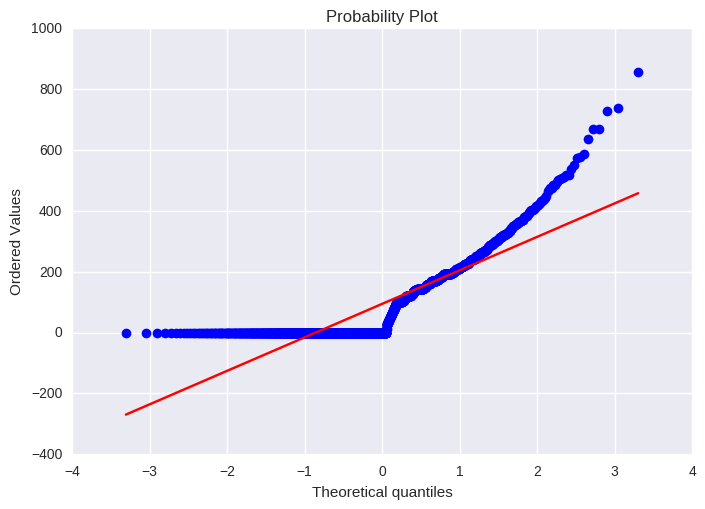

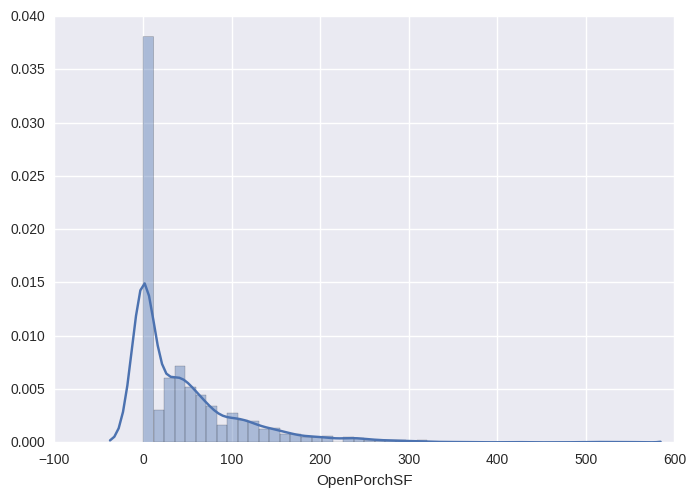

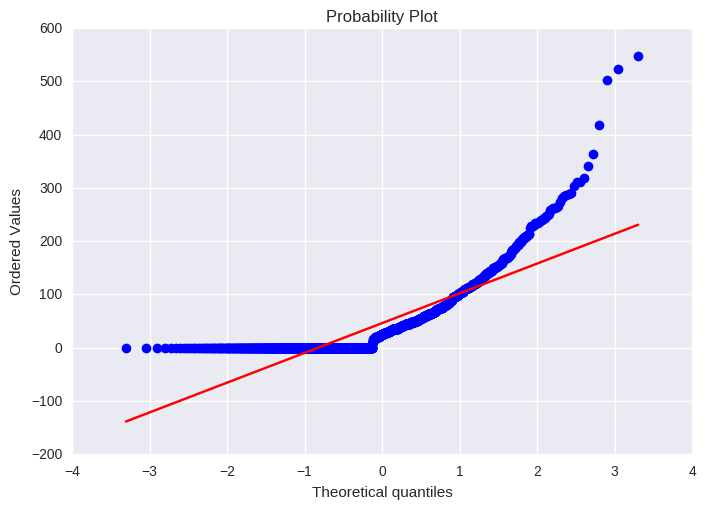

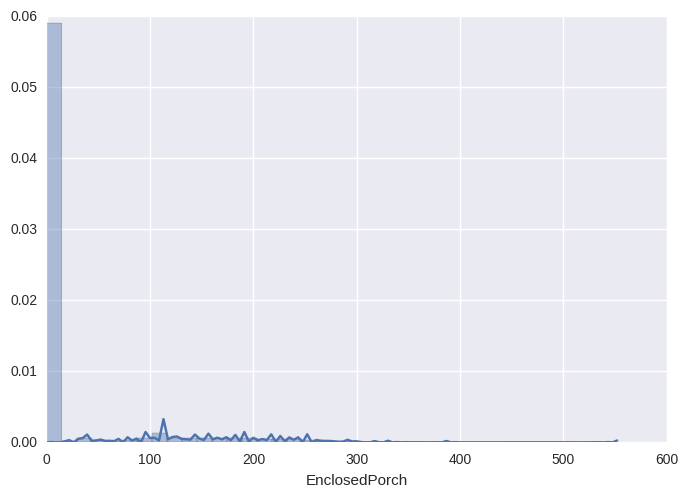

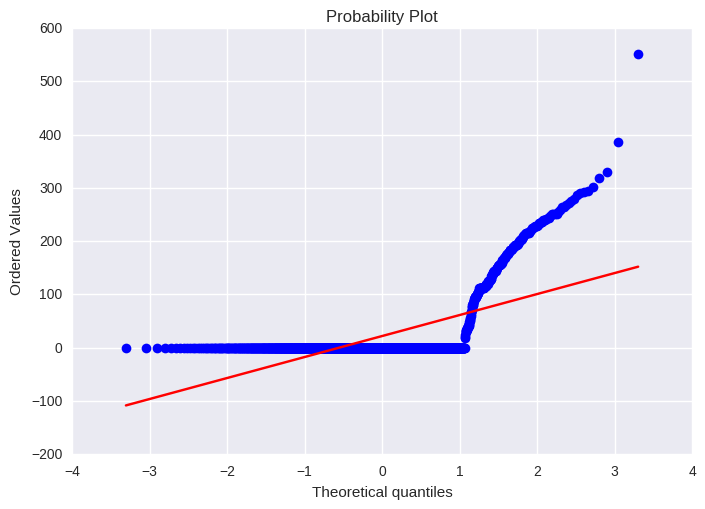

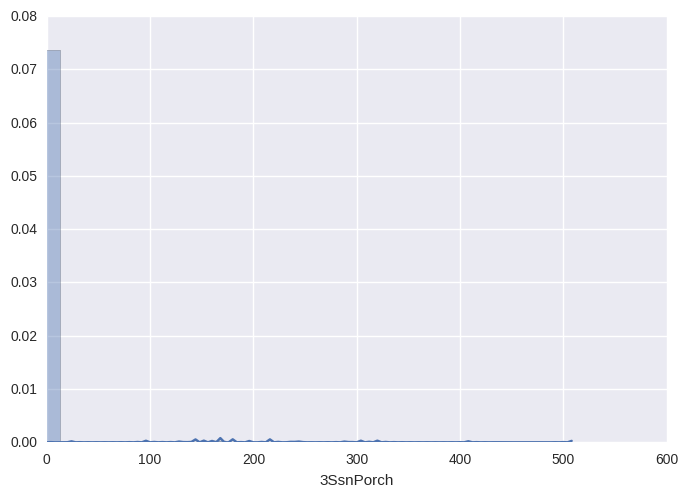

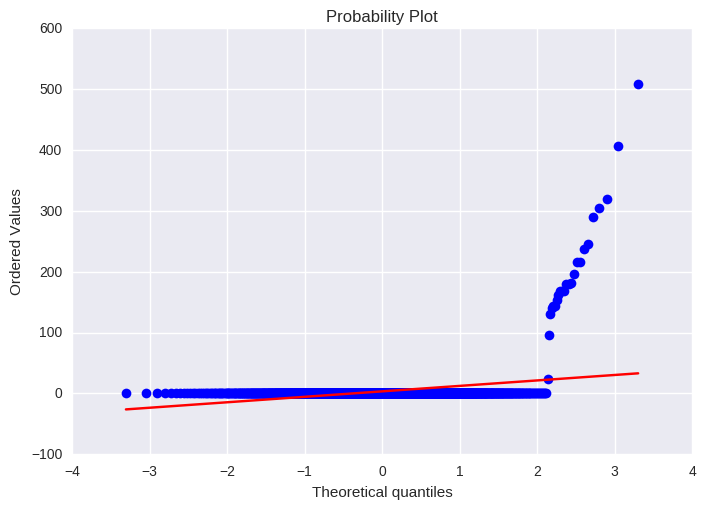

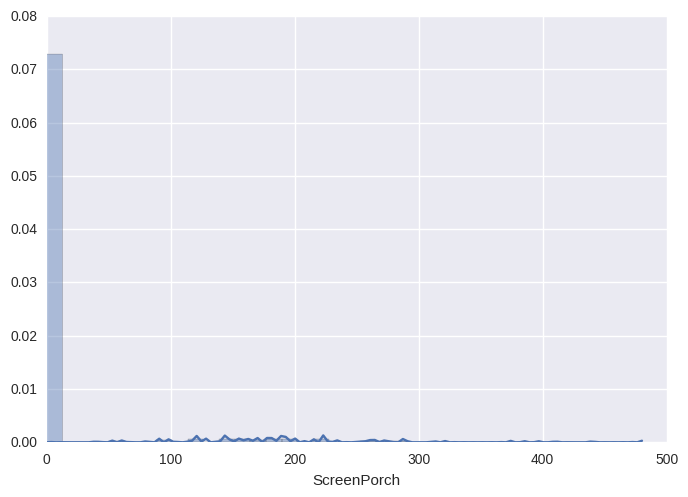

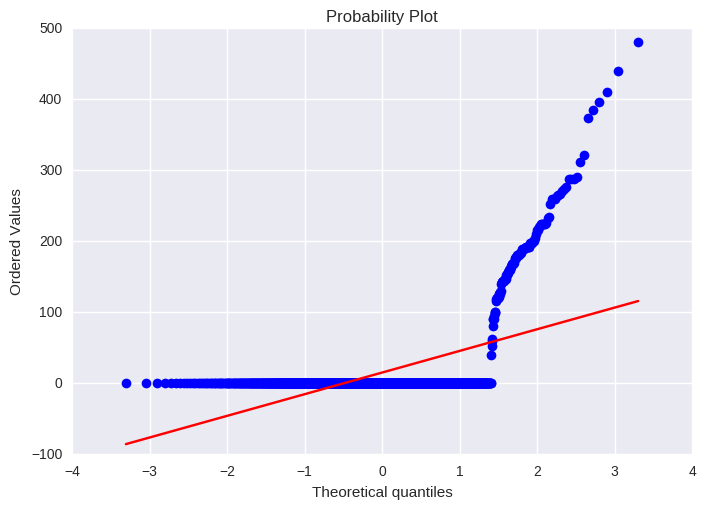

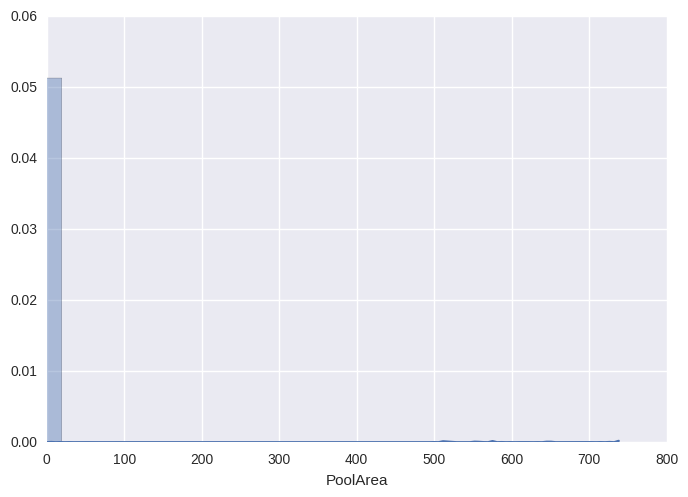

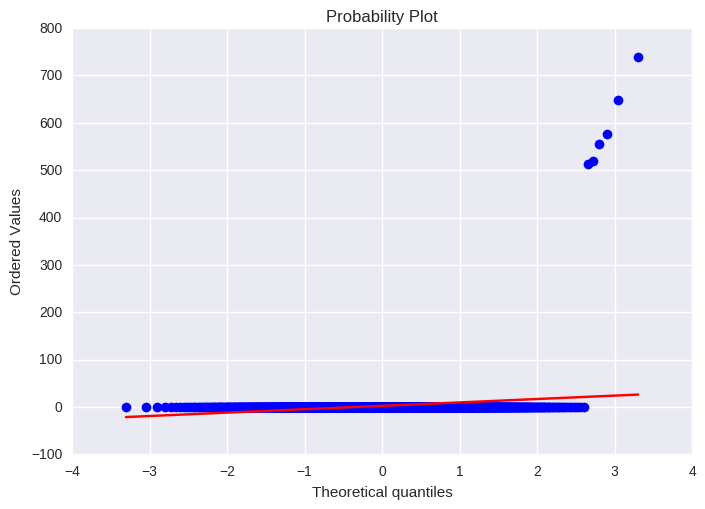

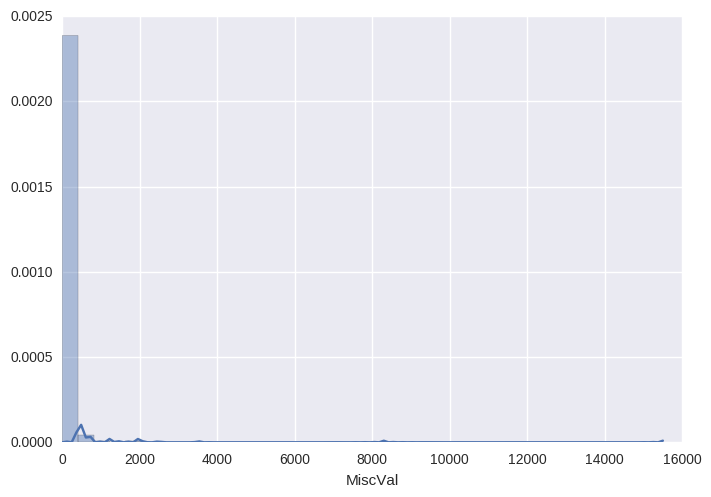

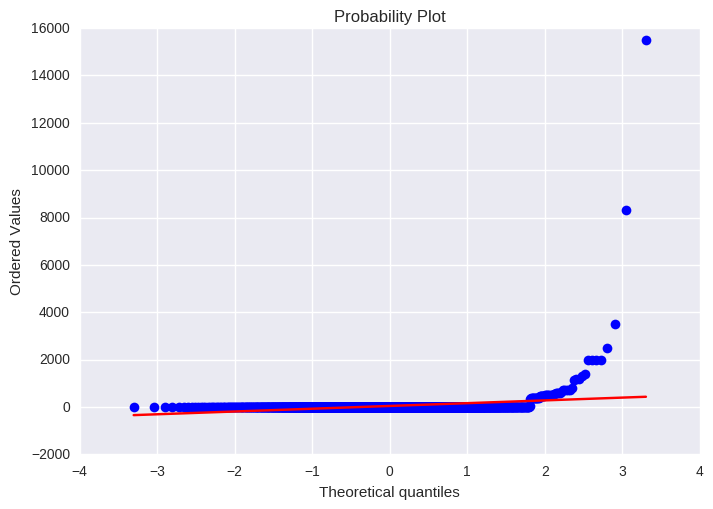

In [39]:
for col in numerical_columns:
    #histogram and normal probability plot
    sns.distplot(df_train[col]);
    fig = plt.figure()
    res = stats.probplot(df_train[col], plot=plt)
    plt.show()